In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from datetime import datetime
from dateutil.relativedelta import relativedelta
mpl.rc('font', family = 'Malgun Gothic')

In [60]:
corona_conf = pd.read_csv('time.csv') # 일별 확진자 누적데이터.csv
corona_conf
# 사회적 거리두기 2020-03-22

date  time    test  negative  confirmed  released  deceased
0    2020-01-20    16       1         0          1         0         0
1    2020-01-21    16       1         0          1         0         0
2    2020-01-22    16       4         3          1         0         0
3    2020-01-23    16      22        21          1         0         0
4    2020-01-24    16      27        25          2         0         0
..          ...   ...     ...       ...        ...       ...       ...
128  2020-05-27     0  852876    820550      11265     10295       269
129  2020-05-28     0  868666    834952      11344     10340       269
130  2020-05-29     0  885120    849161      11402     10363       269
131  2020-05-30     0  902901    865162      11441     10398       269
132  2020-05-31     0  910822    876060      11468     10405       270

[133 rows x 7 columns]

In [3]:
policy_date = pd.read_csv('policy.csv') # 정책별 시행/종료 날짜데이터.csv
policy_date

policy_id country            type  \
0           1   Korea           Alert   
1           2   Korea           Alert   
2           3   Korea           Alert   
3           4   Korea           Alert   
4           5   Korea     Immigration   
5           6   Korea     Immigration   
6           7   Korea     Immigration   
7           8   Korea     Immigration   
8           9   Korea     Immigration   
9          10   Korea     Immigration   
10         11   Korea     Immigration   
11         12   Korea     Immigration   
12         13   Korea     Immigration   
13         14   Korea     Immigration   
14         15   Korea     Immigration   
15         16   Korea     Immigration   
16         17   Korea     Immigration   
17         18   Korea     Immigration   
18         19   Korea     Immigration   
19         20   Korea          Health   
20         21   Korea          Health   
21         22   Korea          Health   
22         23   Korea          Health   
23         24   Korea          Health   
24         25   Korea          Health   
25         26   Korea          Health   
26         27   Korea          Health   
27         28   Korea          Health   
28         29   Korea          Social   
29         30   Korea          Social   
30         31   Korea          Social   
31         32   Korea          Social   
32         33   Korea       Education   
33         34   Korea       Education   
34         35   Korea       Education   
35         36   Korea       Education   
36         37   Korea       Education   
37         38   Korea       Education   
38         39   Korea       Education   
39         40   Korea       Education   
40         41   Korea       Education   
41         42   Korea       Education   
42         43   Korea       Education   
43         44   Korea       Education   
44         45   Korea       Education   
45         46   Korea       Education   
46         47   Korea       Education   
47         48   Korea      Technology   
48         49   Korea      Technology   
49         50   Korea      Technology   
50         51   Korea      Technology   
51         52   Korea      Technology   
52         53   Korea  Administrative   
53         54   Korea  Administrative   
54         55   Korea  Administrative   
55         56   Korea  Transformation   
56         57   Korea  Transformation   
57         58   Korea  Transformation   

                                       gov_policy  \
0                  Infectious Disease Alert Level   
1                  Infectious Disease Alert Level   
2                  Infectious Disease Alert Level   
3                  Infectious Disease Alert Level   
4                   Special Immigration Procedure   
5                   Special Immigration Procedure   
6                   Special Immigration Procedure   
7                   Special Immigration Procedure   
8                   Special Immigration Procedure   
9                   Special Immigration Procedure   
10                  Special Immigration Procedure   
11                  Special Immigration Procedure   
12                  Special Immigration Procedure   
13                  Special Immigration Procedure   
14                  Special Immigration Procedure   
15                  Special Immigration Procedure   
16                  Special Immigration Procedure   
17               Mandatory 14-day Self-Quarantine   
18  Mandatory Self-Quarantine & Diagonostic Tests   
19  Emergency Use Authorization of Diagnostic Kit   
20  Emergency Use Authorization of Diagnostic Kit   
21  Emergency Use Authorization of Diagnostic Kit   
22  Emergency Use Authorization of Diagnostic Kit   
23  Emergency Use Authorization of Diagnostic Kit   
24                 Drive-Through Screening Center   
25                 Drive-Through Screening Center   
26                              Mask Distribution   
27                              Mask Distribution   
28                     Social Distancing Campai

In [61]:
# policy_start =  corona['date'] == "2020-03-22"
corona_conf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       133 non-null    object
 1   time       133 non-null    int64 
 2   test       133 non-null    int64 
 3   negative   133 non-null    int64 
 4   confirmed  133 non-null    int64 
 5   released   133 non-null    int64 
 6   deceased   133 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 7.4+ KB


In [62]:
policy_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   policy_id   58 non-null     int64 
 1   country     58 non-null     object
 2   type        58 non-null     object
 3   gov_policy  58 non-null     object
 4   detail      56 non-null     object
 5   start_date  58 non-null     object
 6   end_date    23 non-null     object
dtypes: int64(1), object(6)
memory usage: 3.3+ KB


### 사회적 거리두기

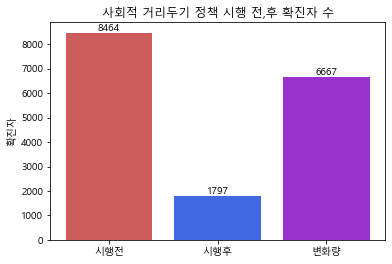

In [63]:
# 사회적 거리두기 정책 시행 날짜
SDC_date = policy_date[policy_date['gov_policy'] == "Social Distancing Campaign"]
SDC_applydate = SDC_date.iloc[0].start_date
SDC_applydate

# 시행날짜 타입 변경(date) => 1달전, 후 날짜 추출
SDC_applydate_date = datetime.strptime(SDC_applydate,"%Y-%m-%d") # 시행날짜 타입 변경
SDC_be_applydate_date = SDC_applydate_date - relativedelta(months= 1) # 30일 전
SDC_aft_applydate_date = SDC_applydate_date + relativedelta(months= 1) # 30일 후
SDC_be_applydate_date,SDC_aft_applydate_date
SDC_be_applydate = str(SDC_be_applydate_date) # 사회적 거리두기 정책 시행 30 일전 날짜
SDC_aft_applydate = str(SDC_aft_applydate_date) # 사회적 거리두기 정책 시행 30 일후 날짜

# 정책 시행일 30일 전 코로나 누적 확진자 수
SDC_be_applydate = SDC_be_applydate[:10]
SDC_policy_be_conf = corona_conf[corona_conf['date'] == SDC_be_applydate]
SDC_policy_be_applyconf = SDC_policy_be_conf.iloc[0].confirmed
SDC_policy_be_applyconf

# 정책 시행일 코로나 누적 확진자 수
SDC_policy_conf = corona_conf[corona_conf['date'] == SDC_applydate]
SDC_policy_applyconf = SDC_policy_conf.iloc[0].confirmed
SDC_policy_applyconf

# 정책 시행일 30일 후 코로나 누적 확진자 수
SDC_aft_applydate = SDC_aft_applydate[:10]
SDC_policy_aft_conf = corona_conf[corona_conf['date'] == SDC_aft_applydate]
SDC_policy_aft_applyconf = SDC_policy_aft_conf.iloc[0].confirmed
SDC_policy_aft_applyconf

# 시행일 전 30일 사이에 확진자 수 =
# 정책 시행일 누적 확진자 수 - 30일 전 누적 확진자 수 
SDC_before_conf = SDC_policy_applyconf - SDC_policy_be_applyconf
SDC_before_conf

# 시행일 후 30일 사이에 확진자 수 =
# 정책 시행일 30일 후 누적 확진자 수 - 정책 시행일 누적 확진자 수
SDC_after_conf = SDC_policy_aft_applyconf - SDC_policy_applyconf
SDC_after_conf

# 시행 전,후 차이량
SDC_change_rate = SDC_before_conf - SDC_after_conf

SDC_confirmed = [SDC_before_conf,SDC_after_conf,SDC_change_rate]
SDC_index = np.arange(len(SDC_confirmed))
SDC_conf_name = ['시행전','시행후','변화량']
SDC_colors = ['indianred','royalblue','darkorchid']

plt.bar(SDC_index,SDC_confirmed, color = SDC_colors)
plt.title("사회적 거리두기 정책 시행 전,후 확진자 수")
plt.ylabel("확진자")
plt.xticks(SDC_index,SDC_conf_name)

for i,v in enumerate(SDC_index):
    plt.text(v, SDC_confirmed[i], SDC_confirmed[i],
            fontsize = 10,
            horizontalalignment='center',
            verticalalignment='bottom')

plt.show()

### 마스크 5부제

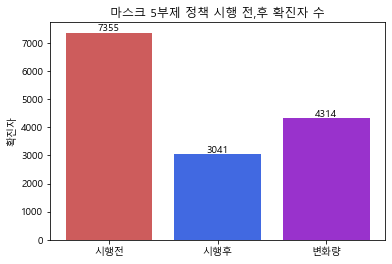

In [64]:
#  마스크 5부제 정책 시행 날짜
MASK_date = policy_date[policy_date['detail'] == "5-day Rotation System"]
MASK_applydate = MASK_date.iloc[0].start_date
MASK_applydate

# 시행날짜 타입 변경(date) => 1달전, 후 날짜 추출
MASK_applydate_date = datetime.strptime(MASK_applydate,"%Y-%m-%d") # 시행날짜 타입 변경
MASK_be_applydate_date = MASK_applydate_date - relativedelta(months= 1) # 30일 전
MASK_aft_applydate_date = MASK_applydate_date + relativedelta(months= 1) # 30일 후
MASK_be_applydate_date,MASK_aft_applydate_date
MASK_be_applydate = str(MASK_be_applydate_date) # 마스크 5부제 정책 시행 날짜 정책 시행 30 일전 날짜
MASK_aft_applydate = str(MASK_aft_applydate_date) # 마스크 5부제 정책 시행 날짜정책 시행 30 일후 날짜

# 정책 시행일 30일 전 코로나 누적 확진자 수
MASK_be_applydate = MASK_be_applydate[:10]
MASK_policy_be_conf = corona_conf[corona_conf['date'] == MASK_be_applydate]
MASK_policy_be_applyconf = MASK_policy_be_conf.iloc[0].confirmed
MASK_policy_be_applyconf

# 정책 시행일 코로나 누적 확진자 수
MASK_policy_conf = corona_conf[corona_conf['date'] == MASK_applydate]
MASK_policy_applyconf = MASK_policy_conf.iloc[0].confirmed
MASK_policy_applyconf

# 정책 시행일 30일 후 코로나 누적 확진자 수
MASK_aft_applydate = MASK_aft_applydate[:10]
MASK_policy_aft_conf = corona_conf[corona_conf['date'] == MASK_aft_applydate]
MASK_policy_aft_applyconf = MASK_policy_aft_conf.iloc[0].confirmed
MASK_policy_aft_applyconf

# 시행일 전 30일 사이에 확진자 수 =
# 정책 시행일 누적 확진자 수 - 30일 전 누적 확진자 수 
MASK_before_conf = MASK_policy_applyconf - MASK_policy_be_applyconf
MASK_before_conf

# 시행일 후 30일 사이에 확진자 수 =
# 정책 시행일 30일 후 누적 확진자 수 - 정책 시행일 누적 확진자 수
MASK_after_conf = MASK_policy_aft_applyconf - MASK_policy_applyconf
MASK_after_conf

# 시행 전,후 차이량
MASK_change_rate = MASK_before_conf - MASK_after_conf

MASK_confirmed = [MASK_before_conf,MASK_after_conf,MASK_change_rate]
MASK_index = np.arange(len(confirmed))
MASK_conf_name = ['시행전','시행후','변화량']
MASK_colors = ['indianred','royalblue','darkorchid']

plt.bar(MASK_index,MASK_confirmed, color = MASK_colors)
plt.title("마스크 5부제 정책 시행 전,후 확진자 수")
plt.ylabel("확진자")
plt.xticks(MASK_index,MASK_conf_name)

for i,v in enumerate(MASK_index):
    plt.text(v, MASK_confirmed[i], MASK_confirmed[i],
            fontsize = 10,
            horizontalalignment='center',
            verticalalignment='bottom')
plt.show()



### 해외 입국자 2주 자가격리

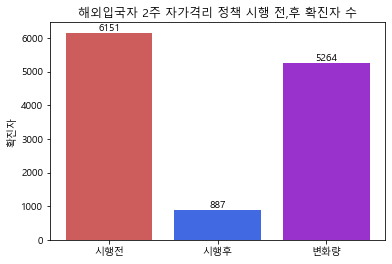

In [93]:
# 해외 입국자 2주 자가격리 정책 시행 날짜
SQ_date = policy_date[policy_date['gov_policy'] == "Mandatory 14-day Self-Quarantine"]
SQ_applydate = SQ_date.iloc[0].start_date
SQ_applydate

# 시행날짜 타입 변경(date) => 1달전, 후 날짜 추출
SQ_applydate_date = datetime.strptime(SQ_applydate,"%Y-%m-%d") # 시행날짜 타입 변경
SQ_be_applydate_date = SQ_applydate_date - relativedelta(months= 1) # 30일 전
SQ_aft_applydate_date = SQ_applydate_date + relativedelta(months= 1) # 30일 후
SQ_be_applydate_date,SQ_aft_applydate_date
SQ_be_applydate = str(SQ_be_applydate_date) # 해외 입국자 2주 자가격리 정책 시행 30 일전 날짜
SQ_aft_applydate = str(SQ_aft_applydate_date) # 해외 입국자 2주 자가격리 정책 시행 30 일후 날짜

# 정책 시행일 30일 전 코로나 누적 확진자 수
SQ_be_applydate = SQ_be_applydate[:10]
SQ_policy_be_conf = corona_conf[corona_conf['date'] == SQ_be_applydate]
SQ_policy_be_applyconf = SQ_policy_be_conf.iloc[0].confirmed
SQ_policy_be_applyconf

# 정책 시행일 코로나 누적 확진자 수
SQ_policy_conf = corona_conf[corona_conf['date'] == SQ_applydate]
SQ_policy_applyconf = SQ_policy_conf.iloc[0].confirmed
SQ_policy_applyconf

# 정책 시행일 30일 후 코로나 누적 확진자 수
SQ_aft_applydate = SQ_aft_applydate[:10]
SQ_policy_aft_conf = corona_conf[corona_conf['date'] == SQ_aft_applydate]
SQ_policy_aft_applyconf = SQ_policy_aft_conf.iloc[0].confirmed
SQ_policy_aft_applyconf

# 시행일 전 30일 사이에 확진자 수 =
# 정책 시행일 누적 확진자 수 - 30일 전 누적 확진자 수 
SQ_before_conf = SQ_policy_applyconf - SQ_policy_be_applyconf
SQ_before_conf

# 시행일 후 30일 사이에 확진자 수 =
# 정책 시행일 30일 후 누적 확진자 수 - 정책 시행일 누적 확진자 수
SQ_after_conf = SQ_policy_aft_applyconf - SQ_policy_applyconf
SQ_after_conf

# 시행 전,후 차이량
SQ_change_rate = SQ_before_conf - SQ_after_conf

SQ_confirmed = [SQ_before_conf,SQ_after_conf,SQ_change_rate]
SQ_index = np.arange(len(SQ_confirmed))
SQ_conf_name = ['시행전','시행후','변화량']
SQ_colors = ['indianred','royalblue','darkorchid']

plt.bar(SQ_index,SQ_confirmed, color = SQ_colors)
plt.title("해외입국자 2주 자가격리 정책 시행 전,후 확진자 수")
plt.ylabel("확진자")
plt.xticks(SQ_index,SQ_conf_name)

for i,v in enumerate(SQ_index):
    plt.text(v, SQ_confirmed[i], SQ_confirmed[i],
            fontsize = 10,
            horizontalalignment='center',
            verticalalignment='bottom')
plt.show()

In [129]:
total_change_amount = pd.DataFrame([SDC_change_rate,MASK_change_rate,SQ_change_rate],
                                  index=['사회적 거리두기',
                                         '마스크 공공5부제',
                                         '해외입국자 2주 자가격리'],
                                 columns =['변화량'])
total_change_amount

변화량
사회적 거리두기       6667
마스크 공공5부제      4314
해외입국자 2주 자가격리  5264

In [130]:
# 정책별 시행후  확진자 변화율
MASK_change_per = MASK_change_rate / MASK_before_conf
SQ_change_per = SQ_change_rate / SQ_before_conf
SDC_change_per = SDC_change_rate / SDC_before_conf

MASK_change_per = round(MASK_change_per * 100, 1)
SQ_change_per = round(SQ_change_per * 100, 1)
SDC_change_per = round(SDC_change_per * 100 ,1)
# MASK_change_per,SQ_change_per,SDC_change_per

total_change_rate = pd.DataFrame([MASK_change_per,SQ_change_per,SDC_change_per],
                                  index=['사회적 거리두기',
                                         '마스크 공공5부제',
                                         '해외입국자 2주 자가격리'],
                                 columns =['변화율'])
total_change_rate

변화율
사회적 거리두기       58.7
마스크 공공5부제      85.6
해외입국자 2주 자가격리  78.8

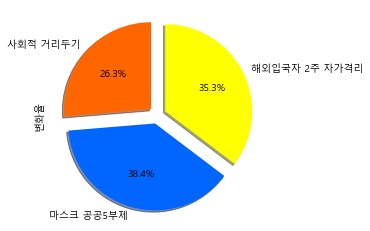

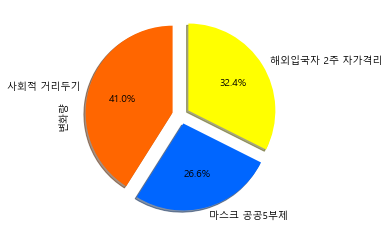

In [131]:
total_change_rate['변화율'].plot.pie( colors=['#ff6600', '#0066ff', '#ffff00'], 
                                 autopct='%0.1f%%', 
                                 explode=[0.1,0.1,0.1],
                                 shadow=True, 
                                 startangle=90)
plt.show()

total_change_amount['변화량'].plot.pie( colors=['#ff6600', '#0066ff', '#ffff00'], 
                                 autopct='%0.1f%%', 
                                 explode=[0.1,0.1,0.1],
                                 shadow=True, 
                                 startangle=90)
plt.show()

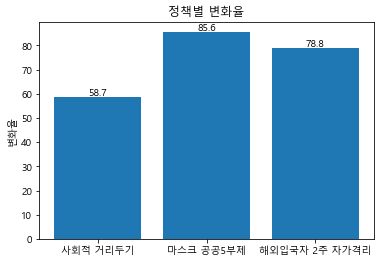

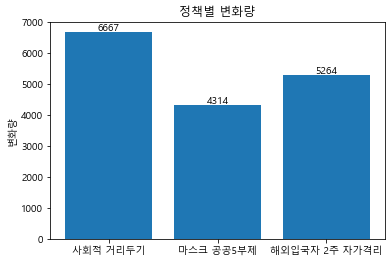

In [132]:
total_confirmed = [MASK_change_per,SQ_change_per,SDC_change_per]
total_index = np.arange(len(total_confirmed))
total_conf_name = ['사회적 거리두기','마스크 공공5부제','해외입국자 2주 자가격리']
# SQ_colors = ['indianred','royalblue','darkorchid']
plt.bar(total_index,total_confirmed) #  color = SQ_colors
plt.title("정책별 변화율")
plt.ylabel("변화율")
plt.xticks(total_index,total_conf_name)

for i,v in enumerate(total_index):
    plt.text(v, total_confirmed[i], total_confirmed[i],
            fontsize = 10,
            horizontalalignment='center',
            verticalalignment='bottom')
plt.show()
total_confirmed = [SDC_change_rate,MASK_change_rate,SQ_change_rate]
total_index = np.arange(len(total_confirmed))
total_conf_name = ['사회적 거리두기','마스크 공공5부제','해외입국자 2주 자가격리']
# SQ_colors = ['indianred','royalblue','darkorchid']
plt.bar(total_index,total_confirmed) #  color = SQ_colors
plt.title("정책별 변화량")
plt.ylabel("변화량")
plt.xticks(total_index,total_conf_name)

for i,v in enumerate(total_index):
    plt.text(v, total_confirmed[i], total_confirmed[i],
            fontsize = 10,
            horizontalalignment='center',
            verticalalignment='bottom')
plt.show()